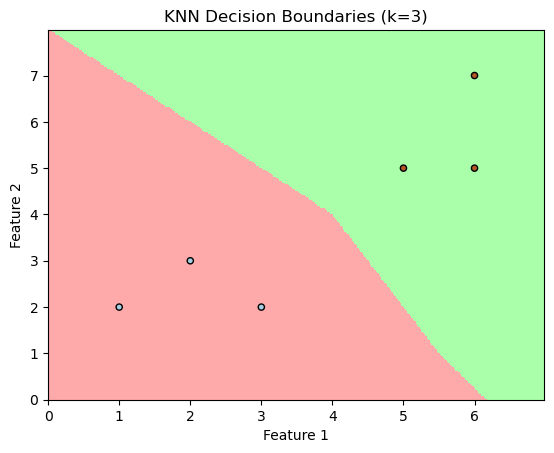

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Creating a simple dataset
X = np.array([[1, 2], [2, 1], [2, 3], [3, 2], [5, 5], [5, 6], [6, 5], [6, 7]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])  # Labels: 0 and 1

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the k-nearest neighbors classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Training the classifier
knn.fit(X_train, y_train)

# Meshgrid creation for plotting decision regions
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicting the class labels for the meshgrid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshaping the predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plotting the decision boundaries
plt.figure()
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plotting the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k', s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundaries (k=3)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


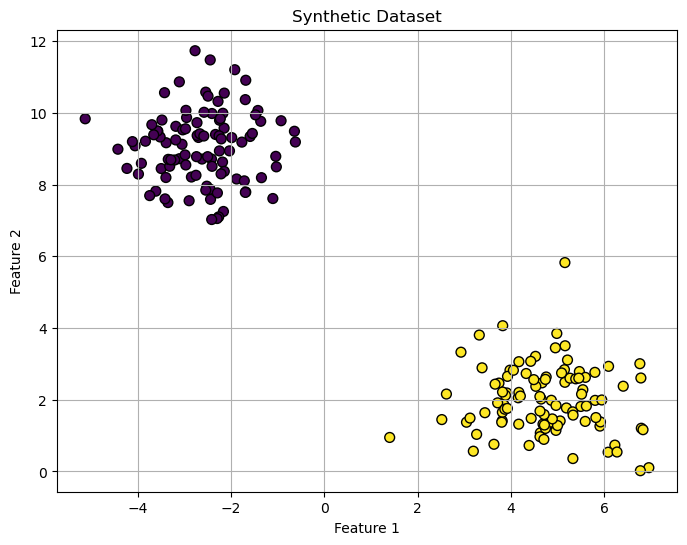

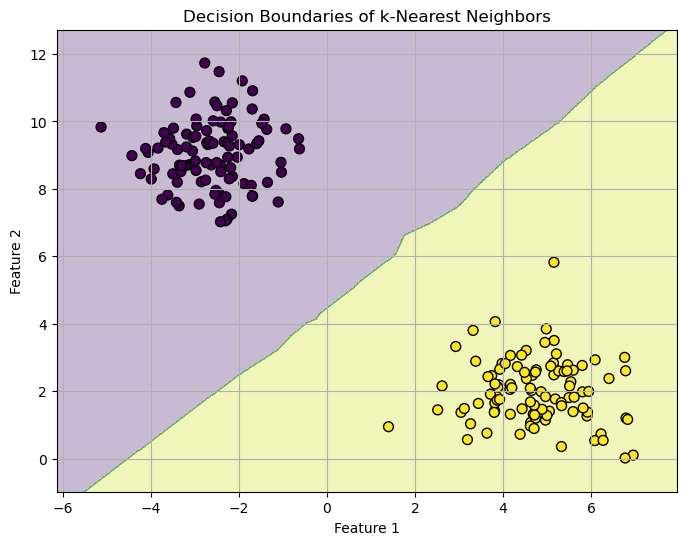

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

# Generate a synthetic dataset with 2 features and 2 classes
X, y = make_blobs(n_samples=200, centers=2, random_state=42)

# Scatter plot of the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
plt.title('Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the k-nearest neighbors classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Training the classifier
knn.fit(X_train, y_train)

# Visualizing the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
plt.title('Decision Boundaries of k-Nearest Neighbors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data[:, :2]  # Considering only the first two features for visualization
y = data.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the k-nearest neighbors classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Training the classifier
knn.fit(X_train, y_train)

# Create a meshgrid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each grid point
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

# Plotting training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolors='k', label='Train')
# Plotting testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolors='k', label='Test')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('K-Nearest Neighbors Decision Boundaries')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data[:, :2]  # Considering only the first two features for visualization
y = data.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Range of k values to try
k_values = range(1, 21)

# List to store accuracy for each value of k
accuracy_values = []

# Train the classifier for each value of k and compute accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plotting accuracy versus k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Accuracy vs. K value for K-Nearest Neighbors')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the optimal k value
optimal_k = k_values[np.argmax(accuracy_values)]
print("Optimal K value:", optimal_k)

# Visualize decision boundaries for the optimal k value
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X, y)

# Create a meshgrid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each grid point
Z = knn_optimal.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

# Plotting data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title(f'K-Nearest Neighbors Decision Boundaries (k={optimal_k})')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the digits dataset
data = load_digits()
X = data.data
y = data.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Range of k values to try
k_values = range(1, 21)

# List to store accuracy for each value of k
accuracy_values = []

# Train the classifier for each value of k and compute accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plotting accuracy versus k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Accuracy vs. K value for K-Nearest Neighbors')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the optimal k value
optimal_k = k_values[np.argmax(accuracy_values)]
print("Optimal K value:", optimal_k)

# Visualize decision boundaries for the optimal k value
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X, y)

# No visualization for digits data due to high dimensionality
